In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm

Reminder.  A flat pdf between x1 and x2 has 
variance (x2-x1)/12.

 For the product of random variables, I know <br>
 how to calculate the mean $m$ and the variance $v$. <br>
 (The variance at least approximately with  <br>
 "propagation of errors") <br>
 
 Equations in <br>
 https://en.wikipedia.org/wiki/Log-normal_distribution <br>
 give the mean and the variance of the lognormal <br>
 in the terms of two parameters $\mu$ and $\sigma$ as  <br>
 $m =$ exp($\mu + \sigma^2/2$)  and <br>
 $v =$ (exp($\sigma^2$) - 1)exp($2\mu + \sigma^2)$ = $m^2$ (exp($\sigma^2$) - 1) <br>
 Can then solve for <br>
 $\sigma^2 = \log(1 + v/m^2)$ and <br>
 exp($\mu$) = $m$ exp(-$\sigma^2/2$)  
 
 The corresponding parameters of the scipy parametrization are <br>
 loc = 0 <br>
 s = $\sigma$ <br>
 scale = exp($\mu$) 
 
 I will superimpose to the data a "guessed" curve with the <br>
 three parameters above. I will also fit the data to a lognormal <br>
 (without fixing loc=0) and compare.


In [2]:
# initialize random number generator
np.random.seed(3862)

<hr style="border:2px solid blue"> </hr>

## First: flat random numbers

In [3]:
# Add up n random numbers between 0 and 1 N times
# Multiply n random numbers between 0.5 and 1.5 N times
n     = 10
N     = 10000
sumn  = np.empty(N)
prodn = np.empty(N)
for i in range(N):
    sample   = np.random.uniform(size=n)
    sumn[i]  = sample.sum()
    prodn[i] = np.prod(sample+0.5)
    
# expected mean and variance of sumn
mean   = 0.5*n
sigma2 = n/12  
sigma  = math.sqrt(sigma2)

# expected mean and variance of prodn
# propagation of errors y=x1*x2*...*xn
# (sigmay/mu_y)**2 = (sigmax1/mu_x1)**2 + (sigmax2/mu_x2)**2 + ....
# (sigmay/mu_y)**2 = n*(sigmax/mu_x)**2

temp        = 1./12
mean_prod   = 1.
sigma2_prod = mean_prod*mean_prod*(n*temp/(1*1))
sigma_prod  = math.sqrt(sigma2_prod)

In [4]:
# The guess
sGuess     = math.sqrt( math.log(1+sigma_prod*sigma_prod/(mean_prod*mean_prod) ) )
scaleGuess = mean_prod * math.exp( -sGuess*sGuess/2.  ) 

# Fit the data to a lognormal.  Use initial guess to help it.
sFit, locFit, scaleFit = lognorm.fit(prodn, scale=scaleGuess)
print(sFit, scaleFit, locFit)
print(sGuess, scaleGuess)

0.9593158118628402 0.6453187312988207 -0.0058693732875493045
0.7785472391385866 0.7385489458759964


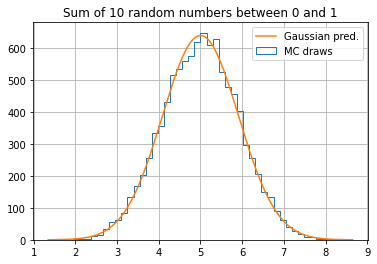

In [5]:
# plot histogram for sum and compare with gauss
nbins = 50
bins  = np.linspace(mean-4*sigma, mean+4*sigma, nbins+1)
bsize = bins[1]-bins[0]
ax    = plt.subplot(111)
ax.hist(sumn, bins, histtype='step', label="MC draws")
x     =  np.linspace(bins[0], bins[-1], 1000)
ax.plot(x, N*bsize*norm.pdf(x, scale=sigma, loc=mean),  label="Gaussian pred.")
ax.set_title("Sum of "+str(n)+" random numbers between 0 and 1")
ax.legend()
ax.grid()

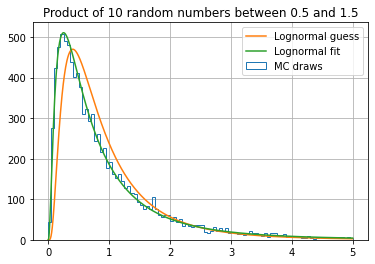

In [6]:
# plot histogram for product and compare with lognormal
nbins = 100
bins  = np.linspace(0., 5, nbins+1)
bsize = bins[1]-bins[0]
ax    = plt.subplot(111)
ax.hist(prodn, bins, histtype='step', label="MC draws")
x     =  np.linspace(bins[0], bins[-1], 1000)
### ax.plot(x, N*bsize*lognorm.pdf(x, s=sigma_prod/mean_prod, scale=mean_prod), label="Lognormal guess")
ax.plot(x, N*bsize*lognorm.pdf(x, s=sGuess, scale=scaleGuess), label="Lognormal guess")
ax.plot(x, N*bsize*lognorm.pdf(x, s=sFit, scale=scaleFit, loc=locFit), label="Lognormal fit")


ax.set_title("Product of "+str(n)+" random numbers between 0.5 and 1.5")
ax.legend()
ax.grid()

<hr style="border:2px solid blue"> </hr>

## Second: Gaussian random numbers
### Same means and sigmas

In [7]:
# Add up n ramdom gaussian numbers sigma=s mean=m N times
# Multiply n random gaussian numbers sigma=s mean=m N times
n     = 10
N     = 10000
s     = 0.2
m     = 1.5
sumn = np.empty(N) 
prodn = np.empty(N) 
for i in range(N):
    sample   = np.random.normal(loc=m,scale=s, size=n)
    sumn[i]  = sample.sum()
    prodn[i] = np.prod(sample)
    
# expected mean and variance of sumn
mean   = n*m
sigma2 = n*s*s  
sigma  = math.sqrt(sigma2)

# expected mean and variance of prodn
# propagation of errors y=x1*x2*...*xn
# (sigmay/mu_y)**2 = (sigmax1/mu_x1)**2 + (sigmax2/mu_x2)**2 + ....
# (sigmay/mu_y)**2 = n*(sigmax/mu_x)**2

temp        = s*s
mean_prod   = math.pow(m,n)
sigma2_prod = mean_prod*mean_prod*(n*temp/(m*m))
sigma_prod  = math.sqrt(sigma2_prod)

In [8]:
# The guess
sGuess     = math.sqrt( math.log(1+sigma_prod*sigma_prod/(mean_prod*mean_prod) ) )
scaleGuess = mean_prod * math.exp( -sGuess*sGuess/2.  ) 

# Fit the data to a lognormal.  Use initial guess to help it.
sFit, locFit, scaleFit = lognorm.fit(prodn, scale=scaleGuess)
print(sFit, scaleFit, locFit)
print(sGuess, scaleGuess)

0.399121725840448 56.7119728220155 -3.5599773618453523
0.40451133949717916 53.13502786219919


In [9]:
# plot histogram and compare with gauss
nbins = 50
bins  = np.linspace(mean-4*sigma, mean+4*sigma, nbins+1)
bsize = bins[1]-bins[0]
ax    = plt.subplot(111)
ax.hist(sumn, bins, histtype='step', label="MC draws")
x     =  np.linspace(bins[0], bins[-1], 1000)
ax.plot(x, N*bsize*norm.pdf(x, scale=sigma, loc=mean),  label="Gaussian pred.")
ax.set_title("Sum of "+str(n)+" ran gaus numbers mean="+str(m)+ " sigma="+str(s))
ax.legend()
ax.grid()

In [10]:
# plot histogram for product and compare with lognormal (both the guess and the fit)
nbins = 100
bins  = np.linspace(max(0.,mean_prod-4*sigma_prod), mean_prod+4*sigma_prod, nbins+1)
bsize = bins[1]-bins[0]
ax    = plt.subplot(111)
ax.hist(prodn, bins, histtype='step', label="MC draws")
x     =  np.linspace(bins[0], bins[-1], 1000)
ax.plot(x, N*bsize*lognorm.pdf(x, s=sGuess, scale=scaleGuess), label="Lognormal guess")
ax.plot(x, N*bsize*lognorm.pdf(x, s=sFit, scale=scaleFit, loc=locFit), label="Lognormal fit")
ax.set_title("Product of "+str(n)+" ran gaus numbers mean="+str(m)+ " sigma="+str(s))
ax.legend()
ax.grid()

<hr style="border:2px solid blue"> </hr>

## Third: Gaussian random numbers
### Different means and sigmas 


In [11]:
# Add up n ramdom gaussian numbers different sigma/mean N times
# Multiply the same N times
n       = 10
N       = 10000
mArray  = np.random.uniform(0.7, 2.5, n)
sArray  = np.random.uniform(0.05,0.25,n)*mArray
sumn  = np.empty(N) 
prodn = np.empty(N) 
for i in range(N):
    sample = np.zeros(n)
    for j,m,s in zip(range(n), mArray, sArray):
        sample[j] = np.random.normal(loc=m,scale=s)
    sumn[i]  = sample.sum()
    prodn[i] = np.prod(sample)
    
# expected mean and variance of sumn
mean   = mArray.sum()
sigma2 = (sArray*sArray).sum()
sigma  = math.sqrt(sigma2)

# expected mean and variance of prodn
# propagation of errors y=x1*x2*...*xn
# (sigmay/mu_y)**2 = (sigmax1/mu_x1)**2 + (sigmax2/mu_x2)**2 + ....

mean_prod   = np.prod(mArray)
sigma2_prod = mean_prod*mean_prod * ((sArray*sArray/(mArray*mArray)).sum())
sigma_prod  = math.sqrt(sigma2_prod)

In [12]:
# The guess
sGuess     = math.sqrt( math.log(1+sigma_prod*sigma_prod/(mean_prod*mean_prod) ) )
scaleGuess = mean_prod * math.exp( -sGuess*sGuess/2.  ) 

# Fit the data to a lognormal.  Use initial guess to help it.
sFit, locFit, scaleFit = lognorm.fit(prodn, scale=scaleGuess)
print(sFit, scaleFit, locFit)
print(sGuess, scaleGuess)

0.41062472393686145 11.988482618180505 -1.9656841472750792
0.45985123523067944 9.946621036912386


In [13]:
# plot histogram and compare with gauss
nbins = 50
bins  = np.linspace(mean-4*sigma, mean+4*sigma, nbins+1)
bsize = bins[1]-bins[0]
ax    = plt.subplot(111)
ax.hist(sumn, bins, histtype='step', label="MC draws")
x     =  np.linspace(bins[0], bins[-1], 1000)
ax.plot(x, N*bsize*norm.pdf(x, scale=sigma, loc=mean),  label="Gaussian pred.")
ax.set_title("Sum of "+str(n)+" ran gaus numbers, different means, sigmas")
ax.legend()
ax.grid()

In [14]:
# plot histogram for product and compare with lognormal (both the guess and the fit)
nbins = 100
bins  = np.linspace(max(0.,mean_prod-4*sigma_prod), mean_prod+4*sigma_prod, nbins+1)
bsize = bins[1]-bins[0]
ax    = plt.subplot(111)
ax.hist(prodn, bins, histtype='step', label="MC draws")
x     =  np.linspace(bins[0], bins[-1], 1000)
ax.plot(x, N*bsize*lognorm.pdf(x, s=sGuess, scale=scaleGuess), label="Lognormal guess")
ax.plot(x, N*bsize*lognorm.pdf(x, s=sFit, scale=scaleFit, loc=locFit), label="Lognormal fit")
ax.set_title("Product of "+str(n)+" ran gaus numbers, different means, sigmas")
ax.legend()
ax.grid()